In [1]:
import sys
sys.path.append( '../utilities' )
from data_engine import DataEngine
from backtesting import Backtesting
import pandas as pd
import ta
import ccxt
import json
f = open('../database/pair_list.json',)
pairJson = json.load(f)
f.close()

In [2]:
pairList = pairJson['Top29FTX']
timeframe = '1h'
startDate = '2018-01-01T00:00:00'

dataEngine = DataEngine(session=ccxt.binance())

dfList = []
for pair in pairList:
    df = dataEngine.get_historical_from_db(pair, timeframe, startDate)
    dfList.append(df)

print("Data load 100%")
dfList[0]

Successfully load 35547 candles for BTCUSDT
Successfully load 35547 candles for ETHUSDT
Successfully load 35547 candles for BNBUSDT
Successfully load 35547 candles for LTCUSDT
Successfully load 22412 candles for DOGEUSDT
Successfully load 32620 candles for XRPUSDT
Successfully load 12770 candles for SOLUSDT
Successfully load 6249 candles for SHIBUSDT
Successfully load 26478 candles for LINKUSDT
Successfully load 11885 candles for UNIUSDT
Successfully load 24079 candles for MATICUSDT
Successfully load 10723 candles for AXSUSDT
Successfully load 8168 candles for CAKEUSDT
Successfully load 18401 candles for FTTUSDT
Successfully load 31705 candles for TRXUSDT
Successfully load 18922 candles for BCHUSDT
Successfully load 22996 candles for FTMUSDT
Successfully load 9685 candles for GRTUSDT
Successfully load 11213 candles for AAVEUSDT
Successfully load 24642 candles for OMGUSDT
Successfully load 14205 candles for LRCUSDT
Successfully load 12261 candles for SUSHIUSDT
Successfully load 12886 ca

,open,high,low,close,volume
timestamp,,,,,
2018-01-01 00:00:00,13715.65,13715.65,13400.01,13529.01,443.356199
2018-01-01 01:00:00,13528.99,13595.89,13155.38,13203.06,383.697006
2018-01-01 02:00:00,13203.00,13418.43,13200.00,13330.18,429.064572
2018-01-01 03:00:00,13330.26,13611.27,13290.00,13410.03,420.087030
2018-01-01 04:00:00,13434.98,13623.29,13322.15,13601.01,340.807329
...,...,...,...,...,...
2022-01-25 21:00:00,36859.80,36905.87,36421.56,36556.04,1507.442730
2022-01-25 22:00:00,36556.04,36791.16,36432.73,36791.16,721.195630
2022-01-25 23:00:00,36791.16,37042.53,36707.34,36958.32,894.830710


In [3]:
# -- Drop all columns we do not need --
for df in dfList:
    # -- Drop all columns we do not need --
    df.drop(columns=df.columns.difference(['open','high','low','close','volume']), inplace=True)

    # -- Indicators, you can edit every value --

# #Simple Moving Average
    df['SMA']=ta.trend.sma_indicator(df['close'], window=12)

# #Exponential Moving Average
    df['EMA']=ta.trend.ema_indicator(close=df['close'], window=12)

# #Relative Strength Index (RSI)
#df['RSI'] =ta.momentum.rsi(close=df['close'], window=14)

# #MACD
    #MACD = ta.trend.MACD(close=df['close'], window_fast=12, window_slow=26, window_sign=9)
    #df['MACD'] = MACD.macd()
    #df['MACD_SIGNAL'] = MACD.macd_signal()
    #df['MACD_DIFF'] = MACD.macd_diff() #Histogramme MACD

# #Stochastic RSI
    #df['STOCH_RSI'] = ta.momentum.stochrsi(close=df['close'], window=14, smooth1=3, smooth2=3) #Non moyenné 
    #df['STOCH_RSI_D'] = ta.momentum.stochrsi_d(close=df['close'], window=14, smooth1=3, smooth2=3) #Orange sur TradingView
    #df['STOCH_RSI_K'] =ta.momentum.stochrsi_k(close=df['close'], window=14, smooth1=3, smooth2=3) #Bleu sur TradingView

# #Ichimoku
    #df['KIJUN'] = ta.trend.ichimoku_base_line(high=df['high'], low=df['low'], window1=9, window2=26)
    #df['TENKAN'] = ta.trend.ichimoku_conversion_line(high=df['high'], low=df['low'], window1=9, window2=26)
    #df['SSA'] = ta.trend.ichimoku_a(high=df['high'], low=df['low'], window1=9, window2=26)
    #df['SSB'] = ta.trend.ichimoku_b(high=df['high'], low=df['low'], window2=26, window3=52)

# #Bollinger Bands
    #BOL_BAND = ta.volatility.BollingerBands(close=df['close'], window=20, window_dev=2)
    #df['BOL_H_BAND'] = BOL_BAND.bollinger_hband() #Bande Supérieur
    #df['BOL_L_BAND'] = BOL_BAND.bollinger_lband() #Bande inférieur
    #df['BOL_MAVG_BAND'] = BOL_BAND.bollinger_mavg() #Bande moyenne

# #ADX
    #ADX = ta.trend.ADXIndicator(df['high'], df['low'], df['close'], window=14) 
    #df['ADX'] = ADX.adx()
    #df['ADX_NEG'] = ADX.adx_neg()
    #df['ADX_POS'] = ADX.adx_pos()

# #Average True Range (ATR)
    #df['ATR'] = ta.volatility.average_true_range(high=df['high'], low=df['low'], close=df['close'], window=14)

# #Super Trend
    #ST_length = 10
    #ST_multiplier = 3.0
    #superTrend = pda.supertrend(high=df['high'], low=df['low'], close=df['close'], length=ST_length, multiplier=ST_multiplier)
    #df['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)] #Valeur de la super trend
    #df['SUPER_TREND_DIRECTION'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)] #Retourne 1 si vert et -1 si rouge

# #Awesome Oscillator
    #df['AWESOME_OSCILLATOR'] = ta.momentum.awesome_oscillator(high=df['high'], low=df['low'], window1=5, window2=34)

# #Kaufman’s Adaptive Moving Average (KAMA)
    #df['KAMA'] = ta.momentum.kama(close=df['close'], window=10, pow1=2, pow2=30)

# #Choppiness index
    #df['CHOP'] = get_chop(high=df['high'], low=df['low'], close=df['close'], window=14) 

print("Indicators loaded 100%")
dfList[0]

Indicators loaded 100%


,open,high,low,close,volume,SMA,EMA
timestamp,,,,,,,
2018-01-01 00:00:00,13715.65,13715.65,13400.01,13529.01,443.356199,NaN,NaN
2018-01-01 01:00:00,13528.99,13595.89,13155.38,13203.06,383.697006,NaN,NaN
2018-01-01 02:00:00,13203.00,13418.43,13200.00,13330.18,429.064572,NaN,NaN
2018-01-01 03:00:00,13330.26,13611.27,13290.00,13410.03,420.087030,NaN,NaN
2018-01-01 04:00:00,13434.98,13623.29,13322.15,13601.01,340.807329,NaN,NaN
...,...,...,...,...,...,...,...
2022-01-25 21:00:00,36859.80,36905.87,36421.56,36556.04,1507.442730,36716.465000,36707.858161
2022-01-25 22:00:00,36556.04,36791.16,36432.73,36791.16,721.195630,36746.529167,36720.673828
2022-01-25 23:00:00,36791.16,37042.53,36707.34,36958.32,894.830710,36792.555833,36757.234778


In [4]:
dfTestList = []
for df in dfList:
    dfTestList.append(df.loc['2018-01-01':])

# -- Starting value --
startingBalance = 1000
makerFee = 0
takerFee = 0.0007

# -- Rules --
StopLossActivation = False
takeProfitActivation = False
showLog = False

# -- Hyper parameters --
SlPct = 0.015
TpPct = 0.15
maxPositions = 4
maxShop = 35

# -- Trade Functions --

# -- Condition to BUY market --
def buyCondition(row, previousRow=None):
    if (
        row['SMA'] < row['EMA']
    ):
        return True
    else:
        return False

# -- Condition to SELL market --
def sellCondition(row, previousRow=None):
    if (
        row['SMA'] > row['EMA']
    ):
        return True
    else:
        return False

# -- Value initialisation --
usd = startingBalance
wallet = startingBalance
stopLoss = [0] * len(pairList)
takeProfit = [5000000] * len(pairList)
walletCoinArray = [0] * len(pairList)
walletUsdArray = [0] * len(pairList)
activePositions = 0
lastIndex = dfTestList[0].index.values[1]

# -- Definition of dfTrades, that will be the dataset to do your trades analyses --
dfTrades = None
dfTrades = pd.DataFrame(columns=['date', 'symbol','position', 'reason',
                                 'price', 'frais', 'fiat', 'coins', 'wallet'])

# # -- Iteration on all your price dataset (df) --
for index, row in dfTestList[0].iterrows():
    # -- Check if you have one coin in your wallet --
    if (walletCoinArray.count(0) == len(walletCoinArray)) == False:
        # -- Iteration on all coin (upgrade possible: only check coin in your wallet) --
        for i in range(0,len(dfTestList)):
            # -- Check if you have more than 0 coin --
            if walletCoinArray[i] != 0:
                try:
                    actualRow = dfTestList[i].loc[index]
                    # previousRow = dfTestList[i].loc[lastIndex]
                                    # -- Stop Loss --
                    if actualRow['low'] < stopLoss[i] :
                        sellPrice = stopLoss[i]
                        usd = usd + walletCoinArray[i] * sellPrice
                        fee = makerFee * walletCoinArray[i] * sellPrice
                        usd = usd - fee
                        # -- Set coin and equivalent usd to 0 after sold position --
                        walletCoinArray[i] = 0
                        walletUsdArray[i] = 0
                        activePositions -= 1

                        # -- LOG --
                        if showLog:
                            print("Sell COIN at Stop Loss", sellPrice, '$ the', index)

                        # -- Add the trade to dfTrades to analyse it later --
                        myrow = {
                            'date': index,
                            'symbol': pairList[i],
                            'position': "Sell",
                            'reason': 'Sell Stop Loss',
                            'price': sellPrice,
                            'frais': fee,
                            'fiat': usd,
                            'coins': 0,
                            'wallet': sum(walletUsdArray) + usd
                        }
                        dfTrades = dfTrades.append(myrow, ignore_index=True)

                    # -- Take Profit --
                    elif actualRow['high'] > takeProfit[i] :
                        sellPrice = takeProfit[i]
                        usd = usd + walletCoinArray[i] * sellPrice
                        fee = makerFee * walletCoinArray[i] * sellPrice
                        usd = usd - fee
                        # -- Set coin and equivalent usd to 0 after sold position --
                        walletCoinArray[i] = 0
                        walletUsdArray[i] = 0
                        activePositions -= 1

                        # -- LOG --
                        if showLog:
                            print("Sell COIN at Take Profit", sellPrice, '$ the', index)

                        # -- Add the trade to dfTrades to analyse it later --
                        myrow = {
                            'date': index,
                            'symbol': pairList[i],
                            'position': "Sell",
                            'reason': 'Sell Take Profit',
                            'price': sellPrice,
                            'frais': fee,
                            'fiat': usd,
                            'coins': 0,
                            'wallet': sum(walletUsdArray) + usd
                        }
                        dfTrades = dfTrades.append(myrow, ignore_index=True)

                    # -- Sell Market --
                    elif sellCondition(actualRow):
                        sellPrice = actualRow['close']
                        usd = usd + walletCoinArray[i] * sellPrice
                        fee = makerFee * walletCoinArray[i] * sellPrice
                        usd = usd - fee
                        # -- Set coin and equivalent usd to 0 after sold position --
                        walletCoinArray[i] = 0
                        walletUsdArray[i] = 0
                        activePositions -= 1

                        # -- LOG --
                        if showLog:
                            print("Sell", pairList[i],"at", sellPrice, '$ the', index)

                        # -- Add the trade to DfTrades to analyse it later --
                        myrow = {
                            'date': index,
                            'symbol': pairList[i],
                            'position': "Sell",
                            'reason': 'Sell Market Order',
                            'price': sellPrice,
                            'frais': fee,
                            'fiat': usd,
                            'coins': 0,
                            'wallet': sum(walletUsdArray) + usd
                        }
                        dfTrades = dfTrades.append(myrow, ignore_index=True)
                except:
                    pass
    # -- Buy market order --
    # -- Check if you can open a new position --
    if activePositions < maxPositions:
        # -- Check buy condition for each coin of list --
        for i in range(0,len(dfTestList)):
            try:
                actualRow = dfTestList[i].loc[index]
                # previousRow = dfTestList[i].loc[lastIndex]
                # -- Buy condition --
                if buyCondition(actualRow) and activePositions < maxPositions and walletCoinArray[i]==0 :
                    buyPrice = actualRow['close']
                    # -- Define size of the position --
                    usdMultiplier = 1/(maxPositions-activePositions)
                    fee = takerFee * usd * usdMultiplier
                    usd = usd - fee
                    coin = (usd * usdMultiplier) / buyPrice
                    usd = usd - (usd * usdMultiplier)
                    # -- Set coin and equivalent usd to size of position after open position --
                    walletCoinArray[i] = coin
                    walletUsdArray[i] = coin * actualRow['close']
                    activePositions += 1
                    # -- Create a Stop Loss --
                    if StopLossActivation:
                        stopLoss[i] = buyPrice - SlPct * buyPrice
                    # -- Create a Take Profit --
                    if takeProfitActivation:
                        takeProfit[i] = buyPrice + TpPct * buyPrice

                    # -- LOG --
                    if showLog:
                        print("Buy", pairList[i],"at", buyPrice, '$ the', index)

                    # -- Add the trade to dfTrades to analyse it later --
                    myrow = {
                        'date': index,
                        'symbol': pairList[i],
                        'position': "Buy",
                        'reason': 'Buy Market Order',
                        'price': buyPrice,
                        'frais': fee,
                        'fiat': usd,
                        'coins': coin,
                        'wallet': sum(walletUsdArray) + usd
                    }
                    dfTrades = dfTrades.append(myrow, ignore_index=True)
            except:
                pass

    # -- Keep last index to define last row --            
    lastIndex = index

print("Final wallet", sum(walletUsdArray) + usd)


Final wallet 399.8522279647223


In [5]:
BTobject = Backtesting()
newDf = BTobject.multi_spot_backtest_analys(dfTrades=dfTrades, dfTest=dfTestList[0], pairList=pairList, timeframe=timeframe)

Trading Bot on : 29 coins | Timeframe : 1h
Period : [2018-01-01 00:00:00] -> [2022-01-26 01:00:00]
Starting balance : 999.825 $

----- General Informations -----
Final balance : 399.85 $
Performance vs US Dollar : -60.01 %
Bitcoin Buy and Hold Performence : 171.2 %
Performance vs Buy and Hold : -85.25 %
Best trade : +60.24 %, the 2021-01-29 08:00:00
Worst trade : -8.94 %, the 2021-05-19 12:00:00
Worst drawDown : - 98.58 %
Total fees :  566.16 $

----- Trades Informations -----
Total trades on period : 15404
Number of positive trades : 6105
Number of negative trades :  9299
Trades win rate ratio : 39.63 %
Average trades performance : 0.02 %
Average positive trades : 0.74 %
Average negative trades : -0.46 %

----- Trades Reasons -----
Buy Market Order     15408
Sell Market Order    15404
Name: reason, dtype: int64

----- Pair Result -----
-----------------------------------------------------------------------------------------------
Trades      Pair     Sum-result     Mean-trade    Worst

In [ ]:
BTobject.plot_wallet_evolution(dfTrades=newDf['2021'])

In [ ]:
dfTrades.iloc[-10:]

----- 2018 Performances: -83.88% -----


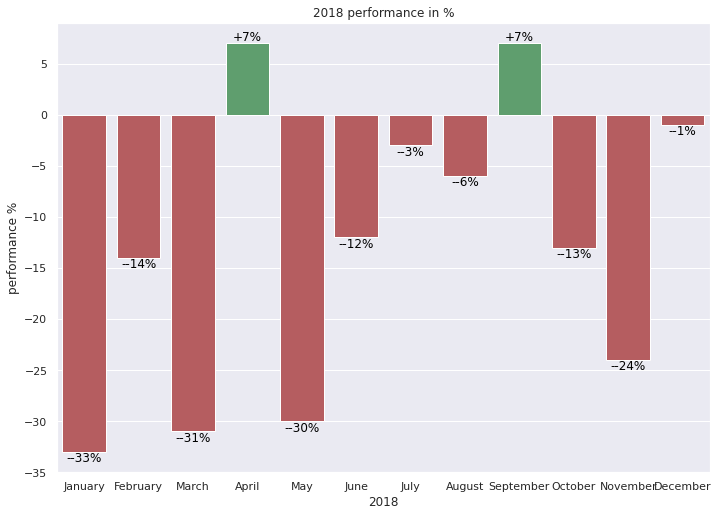

----- 2019 Performances: -67.79% -----


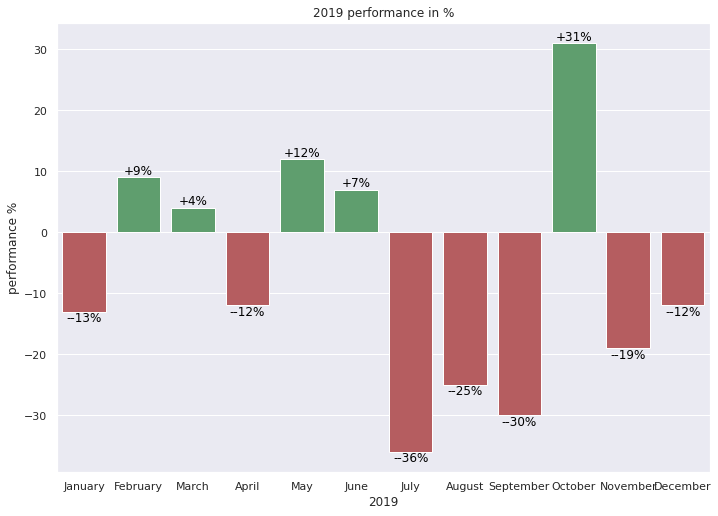

----- 2020 Performances: -58.6% -----


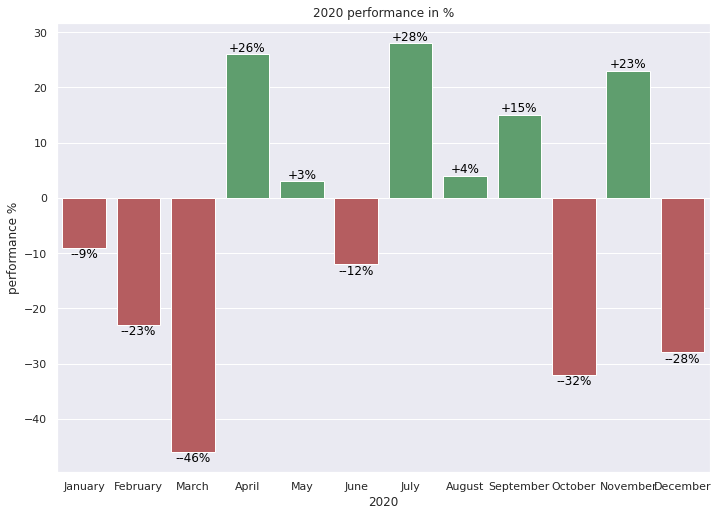

----- 2021 Performances: 2368.21% -----


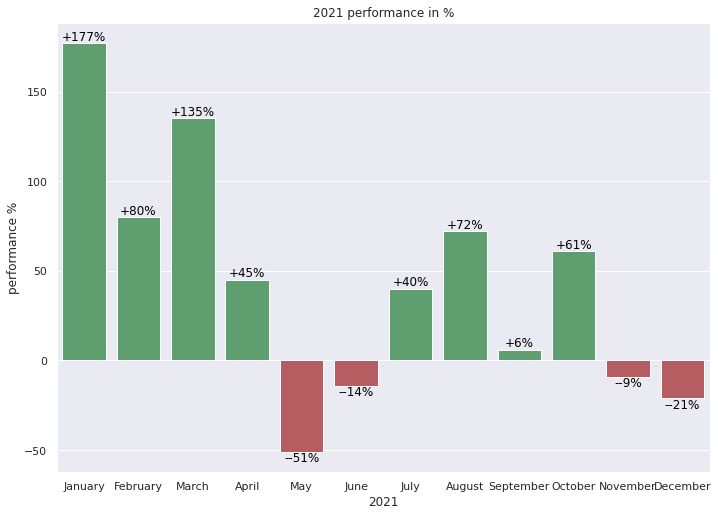

ValueError: Could not interpret input 'date'

In [6]:
BTobject.plot_bar_by_month(dfTrades=dfTrades)